In [11]:
#import scipy 
from scipy.optimize import fmin
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy import interpolate


In [ ]:
# カリブレーション
alpha = 0.33  # 資本分配率
beta = 0.95   # 割引因子
delta = 0.2   # 資本減耗率
gamma = 2.0
g = 0.2    # 政府支出

In [ ]:
#計算に必要な数字
diff = 1e+4 #差の初期値
crit = 1e-4 #閾値
lamk = 0.1 #更新パラメータ
iter = 0


In [ ]:
T = 50  # 時間の長さ
tau_c = [0 if t < 10 else 0.2 for t in range(T+1)] 

In [ ]:
rss = beta**(-1)-1+delta
kss = (alpha * beta / (1 - beta * (1 - delta))) ** (1 / (1 - alpha))
css = kss**alpha-delta*kss-g

In [ ]:
#箱を作る（0〜50期まで）
k0=  kss
kvec0 = np.linspace(k0,kss,T+1)
kvec1 = np.copy(kvec0)
cvec = np.zeros(T+1)
rvec = np.zeros(T)
# kvec = np.zeros(T+1)

In [ ]:
# 繰り返し計算
while diff > crit:

    # 1. 利子率の計算
    
    rvec = alpha * (kvec0 ** (alpha))/kvec0#複素数を避ける #51個
    cvec[T] = css
    # 2. 消費経路の計算（逆順に計算）
    for  i in reversed(range(T)):
        #Rvec[i] = (1 + tau_c[i]) / (1 + tau_c[i+1]) * (1 + rvec[i+1] - delta)
        cvec[i]= cvec[i+1]*(beta*((1 + tau_c[i])*(1 + rvec[i+1] - delta) / (1 + tau_c[i+1]) ))**(-1/gamma)
		    #rvec[i+1]は50個
    #kvec[0]= kss
    # 3. 資本の遷移式から資本ストックを計算
    for t in range(T):
        kvec1[t + 1] = kvec0[t]**alpha +(1 + delta)*kvec1[t]- cvec[t] - g 
        
    kvec = lamk * kvec1 + (1 - lamk)*kvec0 
    #右辺のkvec1はハットがついているk_t^(n),kvec0はハットなしのk_t^(n-1)
    
    diff = np.max(np.abs(kvec - kvec0))
    kvec0 = np.copy(kvec)
    iter += 1

/var/folders/y2/hwl07kg14b31nb5s126cjc8m0000gn/T/ipykernel_87241/1887771788.py:6: RuntimeWarning: invalid value encountered in power
  rvec = alpha * (kvec0 ** (alpha))/kvec0#複素数を避ける #51個
/var/folders/y2/hwl07kg14b31nb5s126cjc8m0000gn/T/ipykernel_87241/1887771788.py:16: RuntimeWarning: invalid value encountered in scalar power
  kvec1[t + 1] = kvec0[t]**alpha +(1 + delta)*kvec1[t]- cvec[t] - g


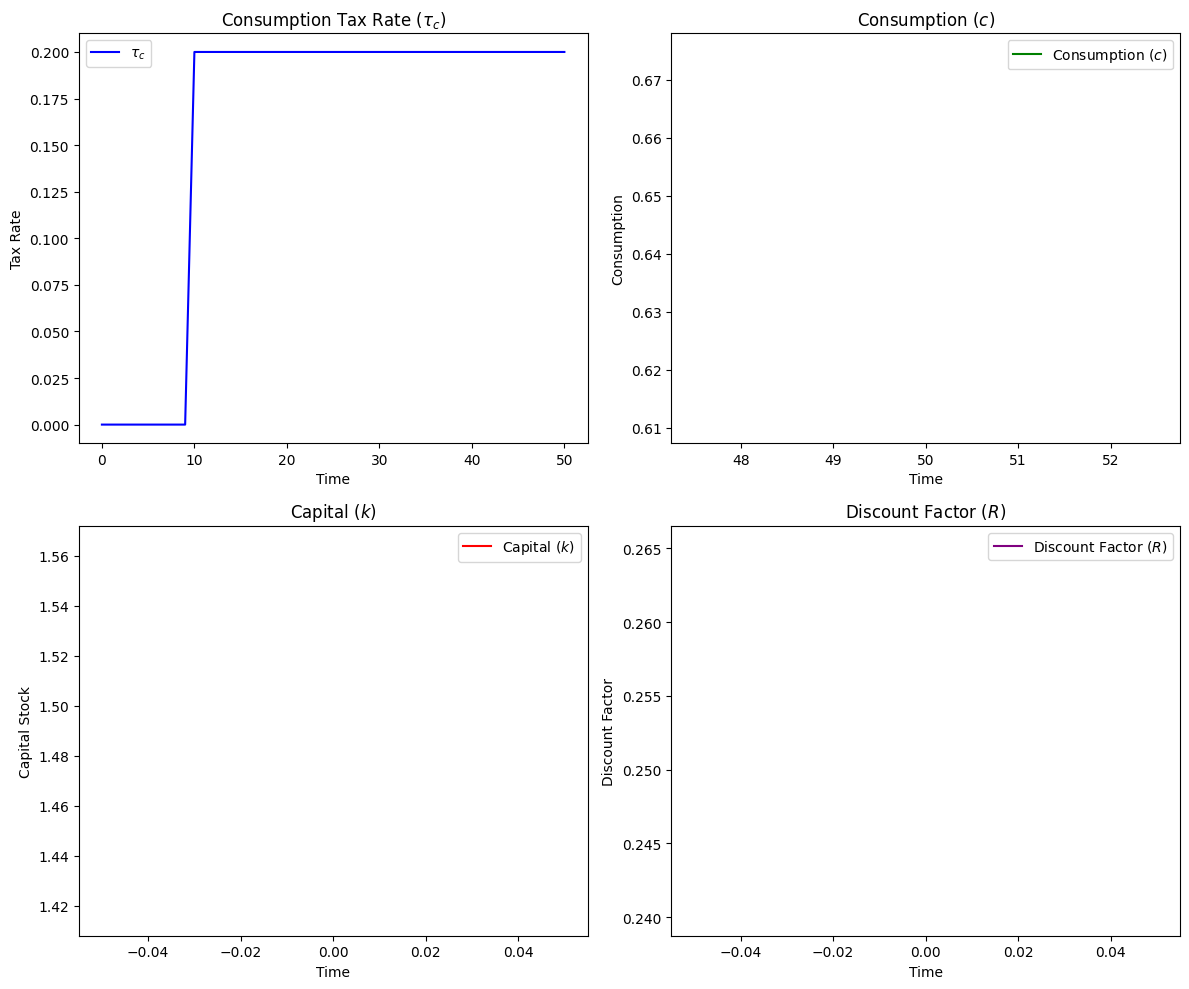

In [ ]:
# プロット
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# tau_cのプロット
axs[0, 0].plot(tau_c, label=r'$\tau_c$', color='blue')
axs[0, 0].set_title('Consumption Tax Rate ($\\tau_c$)')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Tax Rate')
axs[0, 0].legend()

# c (消費) のプロット
axs[0, 1].plot(cvec, label='Consumption ($c$)', color='green')
axs[0, 1].set_title('Consumption ($c$)')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Consumption')
axs[0, 1].legend()

# k (資本) のプロット
axs[1, 0].plot(kvec, label='Capital ($k$)', color='red')
axs[1, 0].set_title('Capital ($k$)')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Capital Stock')
axs[1, 0].legend()

# R (消費者の割引率) のプロット
axs[1, 1].plot(rvec, label='Discount Factor ($R$)', color='purple')
axs[1, 1].set_title('Discount Factor ($R$)')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Discount Factor')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [10]:
%reset -f